In [5]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
import numpy as np
import pandas as pd

num_classes = 7
resnet_weights_path = 'imagenet'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


A local file was found, but it seems to be incomplete or outdated because the md5 file hash does not match the original value of a268eb855778b3df3c7506639542a6af so we will re-download the data.
94658560/94653016 [==============================] - 31s 0us/step


In [6]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
from keras.applications.resnet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = data_generator.flow_from_directory(
        'output/train',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        'output/val',
        target_size=(image_size, image_size),
        class_mode='categorical')

my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=10,
        epochs = 10,
        validation_data=validation_generator,
        validation_steps=1)

Found 1095 images belonging to 7 classes.
Found 136 images belonging to 7 classes.
Epoch 1/10
10/10 [==============================] - 58s 6s/step - loss: 1.5955 - accuracy: 0.4375 - val_loss: 1.3719 - val_accuracy: 0.6562
Epoch 2/10
10/10 [==============================] - 57s 6s/step - loss: 1.1590 - accuracy: 0.6542 - val_loss: 0.9642 - val_accuracy: 0.7500
Epoch 3/10
10/10 [==============================] - 57s 6s/step - loss: 0.9460 - accuracy: 0.7125 - val_loss: 0.7133 - val_accuracy: 0.7500
Epoch 4/10
10/10 [==============================] - 54s 5s/step - loss: 0.7979 - accuracy: 0.8009 - val_loss: 0.5937 - val_accuracy: 0.8750
Epoch 5/10
10/10 [==============================] - 52s 5s/step - loss: 0.7537 - accuracy: 0.7958 - val_loss: 0.7819 - val_accuracy: 0.7500
Epoch 6/10
10/10 [==============================] - 57s 6s/step - loss: 0.5655 - accuracy: 0.8667 - val_loss: 0.5327 - val_accuracy: 0.9062
Epoch 7/10
10/10 [==============================] - 58s 6s/step - loss: 0.560

In [9]:
test_generator = data_generator.flow_from_directory(
        'output/test',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

Found 138 images belonging to 7 classes.


In [10]:
pred = my_new_model.predict(test_generator)


In [11]:
pred


array([[1.85389742e-02, 2.00476917e-03, 2.03243503e-03, 2.29399512e-03,
        1.67774432e-03, 1.38627121e-03, 9.72065806e-01],
       [3.52002494e-03, 5.80208041e-02, 9.37528163e-02, 1.90409571e-02,
        1.57344528e-02, 7.99542725e-01, 1.03882533e-02],
       [1.57171004e-02, 1.55497342e-01, 1.07997470e-02, 6.89626694e-01,
        9.37112421e-02, 7.66532868e-03, 2.69825049e-02],
       [1.45434797e-01, 8.34069073e-01, 5.45048295e-03, 4.34306171e-03,
        6.85184496e-03, 1.61486922e-03, 2.23591179e-03],
       [9.61450219e-01, 3.38903628e-02, 5.27760771e-04, 1.17065280e-03,
        2.38953717e-03, 5.60422341e-05, 5.15290420e-04],
       [6.93464875e-02, 7.30035976e-02, 8.96669086e-03, 6.73435777e-02,
        2.03382462e-01, 2.92310398e-03, 5.75034022e-01],
       [4.45641838e-02, 9.21907425e-01, 2.64190719e-03, 4.81620105e-03,
        2.37001311e-02, 8.65250593e-04, 1.50481740e-03],
       [4.18104529e-02, 9.43765521e-01, 7.65494723e-03, 2.69697444e-03,
        1.16760458e-03, 1

In [12]:
np.save('class_indicesIOS.npy',train_generator.class_indices)

In [14]:
import numpy as np
import pandas as pd
predicted_class_indices=np.argmax(pred,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

['Rainbow_trout', 'LargeMouthBass', 'brook_trout', 'sturgeon', 'brook_trout', 'sturgeon', 'Rainbow_trout', 'small_bass', 'brook_trout', 'Cutthroat_trout', 'LargeMouthBass', 'brook_trout', 'Brown_Trout', 'LargeMouthBass', 'brook_trout', 'Rainbow_trout', 'brook_trout', 'Cutthroat_trout', 'sturgeon', 'Brown_Trout', 'Cutthroat_trout', 'Rainbow_trout', 'Cutthroat_trout', 'brook_trout', 'Cutthroat_trout', 'Cutthroat_trout', 'Brown_Trout', 'Cutthroat_trout', 'Cutthroat_trout', 'sturgeon', 'sturgeon', 'LargeMouthBass', 'brook_trout', 'LargeMouthBass', 'LargeMouthBass', 'Rainbow_trout', 'Cutthroat_trout', 'small_bass', 'LargeMouthBass', 'LargeMouthBass', 'small_bass', 'brook_trout', 'Brown_Trout', 'Rainbow_trout', 'brook_trout', 'Brown_Trout', 'Cutthroat_trout', 'sturgeon', 'small_bass', 'LargeMouthBass', 'sturgeon', 'LargeMouthBass', 'LargeMouthBass', 'LargeMouthBass', 'Rainbow_trout', 'Brown_Trout', 'sturgeon', 'small_bass', 'sturgeon', 'Brown_Trout', 'brook_trout', 'small_bass', 'Brown_Trout

In [11]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.head(20)

Filename      Predictions
0           Brown_Trout\c9.PNG    Rainbow_trout
1           Brown_Trout\f5.PNG   LargeMouthBass
2       Brown_Trout\fish13.png      brook_trout
3       Brown_Trout\fish37.png         sturgeon
4       Brown_Trout\fish59.png      brook_trout
5       Brown_Trout\fish65.png         sturgeon
6       Brown_Trout\fish66.png    Rainbow_trout
7       Brown_Trout\fish70.png       small_bass
8       Brown_Trout\fish72.png      brook_trout
9       Brown_Trout\fish74.png  Cutthroat_trout
10      Brown_Trout\fish83.png   LargeMouthBass
11     Brown_Trout\fishs14.png      brook_trout
12     Brown_Trout\fishs23.png      Brown_Trout
13     Brown_Trout\fishs26.png   LargeMouthBass
14     Brown_Trout\fishs34.png      brook_trout
15     Brown_Trout\fishs38.png    Rainbow_trout
16     Brown_Trout\fishs46.png      brook_trout
17      Brown_Trout\fishs7.png  Cutthroat_trout
18  Cutthroat_trout\cut_33.png         sturgeon
19  Cutthroat_trout\cut_47.png      Brown_Trout

In [13]:
my_new_model.save("IOS_Fish.h5")

In [16]:
import coremltools   
import h5py   
coreml_model = coremltools.converters.keras.convert('IOS_Fish.h5',input_names='image',
                                                    output_names='class',image_input_names = 'image',
                                                    input_name_shape_dict={'image': [None, 224, 224, 3]},
                                                    class_labels = ['brook trout', 'brown trout', 'cutthroat trout', 'largemouth bass ',
                                                                   'rainbow trout', 'smallmouth bass','sturgeon'], is_bgr=True)   
coreml_model.save('IOS_Fish.mlmodel')  

C:\Users\joshc\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


0 : resnet50_input, <keras.engine.input_layer.InputLayer object at 0x000002010D38EFD0>
1 : resnet50_conv1_pad, <keras.layers.convolutional.ZeroPadding2D object at 0x000002010D1D8160>
2 : resnet50_conv1, <keras.layers.convolutional.Conv2D object at 0x000002010D1D8358>
3 : resnet50_bn_conv1, <keras.layers.normalization.BatchNormalization object at 0x000002010D1D8FD0>
4 : resnet50_activation_1, <keras.layers.core.Activation object at 0x000002010D1D8D30>
5 : resnet50_pool1_pad, <keras.layers.convolutional.ZeroPadding2D object at 0x000002010D1DE550>
6 : resnet50_max_pooling2d_1, <keras.layers.pooling.MaxPooling2D object at 0x000002010D1DE748>
7 : resnet50_res2a_branch2a, <keras.layers.convolutional.Conv2D object at 0x000002010D1DE940>
8 : resnet50_bn2a_branch2a, <keras.layers.normalization.BatchNormalization object at 0x000002010D1E4208>
9 : resnet50_activation_2, <keras.layers.core.Activation object at 0x000002010D1E4550>
10 : resnet50_res2a_branch2b, <keras.layers.convolutional.Conv2D obj

88 : resnet50_res4a_branch1, <keras.layers.convolutional.Conv2D object at 0x000002010D263F28>
89 : resnet50_bn4a_branch2c, <keras.layers.normalization.BatchNormalization object at 0x000002010D2690F0>
90 : resnet50_bn4a_branch1, <keras.layers.normalization.BatchNormalization object at 0x000002010D269208>
91 : resnet50_add_8, <keras.layers.merge.Add object at 0x000002010D269320>
92 : resnet50_activation_25, <keras.layers.core.Activation object at 0x000002010D269358>
93 : resnet50_res4b_branch2a, <keras.layers.convolutional.Conv2D object at 0x000002010D269390>
94 : resnet50_bn4b_branch2a, <keras.layers.normalization.BatchNormalization object at 0x000002010D269518>
95 : resnet50_activation_26, <keras.layers.core.Activation object at 0x000002010D269630>
96 : resnet50_res4b_branch2b, <keras.layers.convolutional.Conv2D object at 0x000002010D269668>
97 : resnet50_bn4b_branch2b, <keras.layers.normalization.BatchNormalization object at 0x000002010D2697F0>
98 : resnet50_activation_27, <keras.laye

177 : dense_1__activation__, <keras.layers.core.Activation object at 0x000002013F9585F8>


In [6]:
from tensorflow.python.keras.models import load_model

model1 = load_model('multpleFish')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model1.predict(test_generator)

In [55]:
import glob
list = []
for filepath in glob.iglob(r'C:\Users\joshc\OneDrive\Desktop\test\*.png'):
    list.append(filepath)
print(list)

['C:\\Users\\joshc\\OneDrive\\Desktop\\test\\b8.PNG', 'C:\\Users\\joshc\\OneDrive\\Desktop\\test\\bow_33.png', 'C:\\Users\\joshc\\OneDrive\\Desktop\\test\\bow_47.png', 'C:\\Users\\joshc\\OneDrive\\Desktop\\test\\bow_56.png', 'C:\\Users\\joshc\\OneDrive\\Desktop\\test\\brook_23.png', 'C:\\Users\\joshc\\OneDrive\\Desktop\\test\\brook_37.png', 'C:\\Users\\joshc\\OneDrive\\Desktop\\test\\brook_9.png', 'C:\\Users\\joshc\\OneDrive\\Desktop\\test\\cut_8.png', 'C:\\Users\\joshc\\OneDrive\\Desktop\\test\\fish07.png', 'C:\\Users\\joshc\\OneDrive\\Desktop\\test\\fish1221.png', 'C:\\Users\\joshc\\OneDrive\\Desktop\\test\\fish1261.png', 'C:\\Users\\joshc\\OneDrive\\Desktop\\test\\fish311.png', 'C:\\Users\\joshc\\OneDrive\\Desktop\\test\\fish3120.png', 'C:\\Users\\joshc\\OneDrive\\Desktop\\test\\fish47.png', 'C:\\Users\\joshc\\OneDrive\\Desktop\\test\\fish919.png', 'C:\\Users\\joshc\\OneDrive\\Desktop\\test\\fishs108.png', 'C:\\Users\\joshc\\OneDrive\\Desktop\\test\\fishs82.png', 'C:\\Users\\joshc\\

{'Brown_Trout': 0.16311088, 'Cutthroat_trout': 0.172523, 'LargeMouthBass': 0.36871168, 'Rainbow_trout': 0.10542213, 'brook_trout': 0.045513023, 'small_bass': 0.0679429, 'sturgeon': 0.07677651}


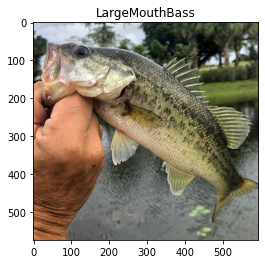

{'Brown_Trout': 0.25404796, 'Cutthroat_trout': 0.45625174, 'LargeMouthBass': 0.11626943, 'Rainbow_trout': 0.050055396, 'brook_trout': 0.05511193, 'small_bass': 0.0052792663, 'sturgeon': 0.062984325}


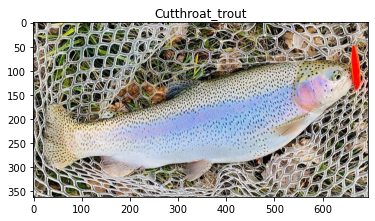

{'Brown_Trout': 0.08873057, 'Cutthroat_trout': 0.108080566, 'LargeMouthBass': 0.38029554, 'Rainbow_trout': 0.3045071, 'brook_trout': 0.0428736, 'small_bass': 0.012135517, 'sturgeon': 0.06337703}


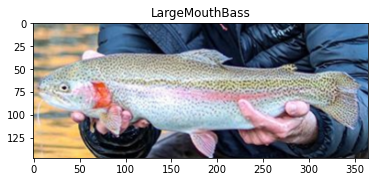

{'Brown_Trout': 0.23688953, 'Cutthroat_trout': 0.12170921, 'LargeMouthBass': 0.091140665, 'Rainbow_trout': 0.08260964, 'brook_trout': 0.35176408, 'small_bass': 0.0075956113, 'sturgeon': 0.10829128}


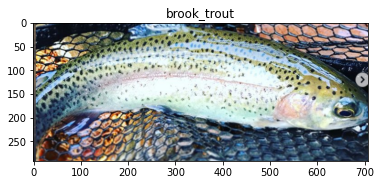

{'Brown_Trout': 0.21102512, 'Cutthroat_trout': 0.5548079, 'LargeMouthBass': 0.052998256, 'Rainbow_trout': 0.05964343, 'brook_trout': 0.06791182, 'small_bass': 0.007891582, 'sturgeon': 0.04572205}


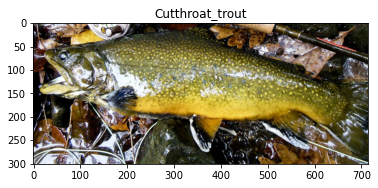

{'Brown_Trout': 0.096153945, 'Cutthroat_trout': 0.39144123, 'LargeMouthBass': 0.14657703, 'Rainbow_trout': 0.11472289, 'brook_trout': 0.19080624, 'small_bass': 0.008027687, 'sturgeon': 0.052271076}


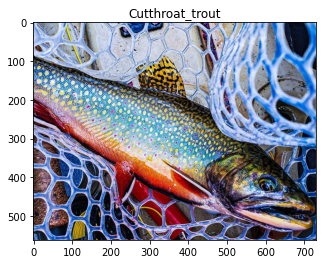

{'Brown_Trout': 0.057235047, 'Cutthroat_trout': 0.21980372, 'LargeMouthBass': 0.26256916, 'Rainbow_trout': 0.13185947, 'brook_trout': 0.25662264, 'small_bass': 0.022669204, 'sturgeon': 0.049240742}


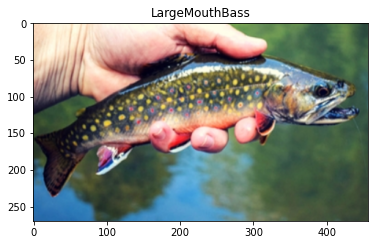

{'Brown_Trout': 0.105130866, 'Cutthroat_trout': 0.47712833, 'LargeMouthBass': 0.12755209, 'Rainbow_trout': 0.14020404, 'brook_trout': 0.07512898, 'small_bass': 0.024423169, 'sturgeon': 0.05043258}


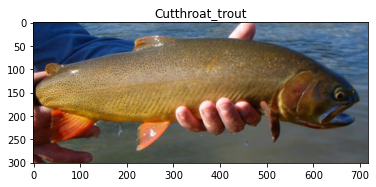

{'Brown_Trout': 0.29009956, 'Cutthroat_trout': 0.16276516, 'LargeMouthBass': 0.10610639, 'Rainbow_trout': 0.12080866, 'brook_trout': 0.20879298, 'small_bass': 0.025550444, 'sturgeon': 0.0858768}


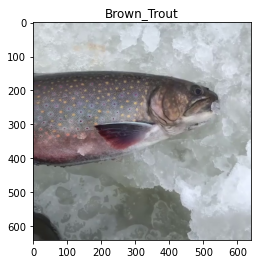

{'Brown_Trout': 0.1911843, 'Cutthroat_trout': 0.6578433, 'LargeMouthBass': 0.013205995, 'Rainbow_trout': 0.022400567, 'brook_trout': 0.022898652, 'small_bass': 0.013911311, 'sturgeon': 0.07855585}


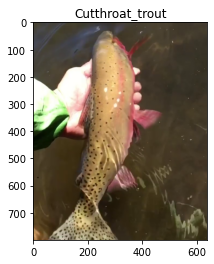

{'Brown_Trout': 0.24689904, 'Cutthroat_trout': 0.5524209, 'LargeMouthBass': 0.007775627, 'Rainbow_trout': 0.021627326, 'brook_trout': 0.028069086, 'small_bass': 0.019945966, 'sturgeon': 0.12326208}


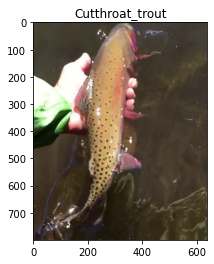

{'Brown_Trout': 0.060889944, 'Cutthroat_trout': 0.091454424, 'LargeMouthBass': 0.04792463, 'Rainbow_trout': 0.017098453, 'brook_trout': 0.7404697, 'small_bass': 0.001954098, 'sturgeon': 0.04020867}


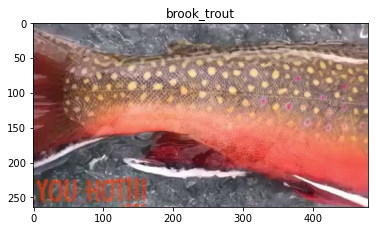

{'Brown_Trout': 0.08967832, 'Cutthroat_trout': 0.19379036, 'LargeMouthBass': 0.18369992, 'Rainbow_trout': 0.07035051, 'brook_trout': 0.30697685, 'small_bass': 0.03428108, 'sturgeon': 0.12122297}


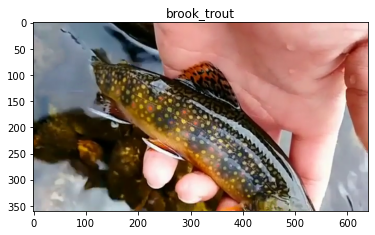

{'Brown_Trout': 0.020291306, 'Cutthroat_trout': 0.92223316, 'LargeMouthBass': 0.0038833742, 'Rainbow_trout': 0.023821615, 'brook_trout': 0.020200545, 'small_bass': 0.0007511934, 'sturgeon': 0.00881869}


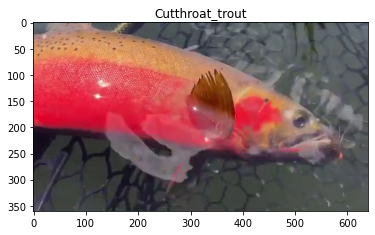

{'Brown_Trout': 0.05998755, 'Cutthroat_trout': 0.0835527, 'LargeMouthBass': 0.013123935, 'Rainbow_trout': 0.07569535, 'brook_trout': 0.6756978, 'small_bass': 0.0027014005, 'sturgeon': 0.08924122}


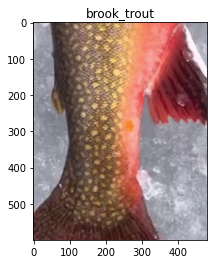

{'Brown_Trout': 0.29651147, 'Cutthroat_trout': 0.2462087, 'LargeMouthBass': 0.13160312, 'Rainbow_trout': 0.051492345, 'brook_trout': 0.031913918, 'small_bass': 0.06267319, 'sturgeon': 0.17959738}


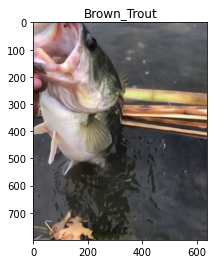

{'Brown_Trout': 0.1190789, 'Cutthroat_trout': 0.032610133, 'LargeMouthBass': 0.17302415, 'Rainbow_trout': 0.5315665, 'brook_trout': 0.02626095, 'small_bass': 0.091968805, 'sturgeon': 0.025490578}


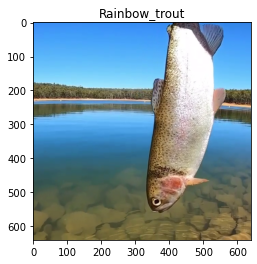

{'Brown_Trout': 0.13032308, 'Cutthroat_trout': 0.07698792, 'LargeMouthBass': 0.52094704, 'Rainbow_trout': 0.09368859, 'brook_trout': 0.070366174, 'small_bass': 0.08387429, 'sturgeon': 0.023812942}


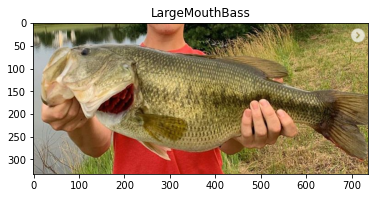

{'Brown_Trout': 0.076683596, 'Cutthroat_trout': 0.04494934, 'LargeMouthBass': 0.5249478, 'Rainbow_trout': 0.06475538, 'brook_trout': 0.06270564, 'small_bass': 0.16739847, 'sturgeon': 0.05855974}


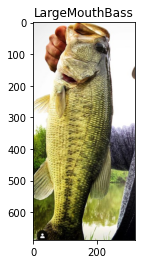

{'Brown_Trout': 0.030063983, 'Cutthroat_trout': 0.01270286, 'LargeMouthBass': 0.53679967, 'Rainbow_trout': 0.065142676, 'brook_trout': 0.021803454, 'small_bass': 0.31802425, 'sturgeon': 0.015463073}


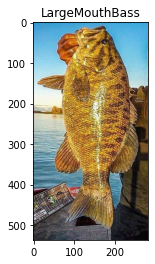

{'Brown_Trout': 0.028831055, 'Cutthroat_trout': 0.221276, 'LargeMouthBass': 0.550438, 'Rainbow_trout': 0.07471852, 'brook_trout': 0.042637076, 'small_bass': 0.05902035, 'sturgeon': 0.023079041}


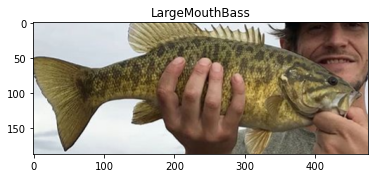

{'Brown_Trout': 0.00861965, 'Cutthroat_trout': 0.0333952, 'LargeMouthBass': 0.07673327, 'Rainbow_trout': 0.19970098, 'brook_trout': 0.18857391, 'small_bass': 0.4564472, 'sturgeon': 0.036529806}


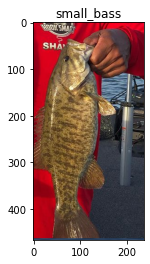

{'Brown_Trout': 0.00011893737, 'Cutthroat_trout': 0.00046749547, 'LargeMouthBass': 0.0005902042, 'Rainbow_trout': 0.0011680351, 'brook_trout': 0.0006604567, 'small_bass': 0.00081522897, 'sturgeon': 0.9961797}


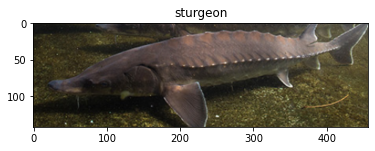

{'Brown_Trout': 0.07298618, 'Cutthroat_trout': 0.3645222, 'LargeMouthBass': 0.040793326, 'Rainbow_trout': 0.055143308, 'brook_trout': 0.104243346, 'small_bass': 0.02509601, 'sturgeon': 0.33721557}


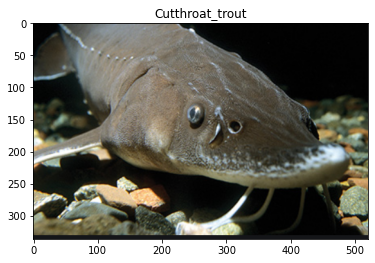

{'Brown_Trout': 0.011289529, 'Cutthroat_trout': 0.018035958, 'LargeMouthBass': 0.0034525339, 'Rainbow_trout': 0.0054283175, 'brook_trout': 0.015014704, 'small_bass': 0.008016094, 'sturgeon': 0.9387628}


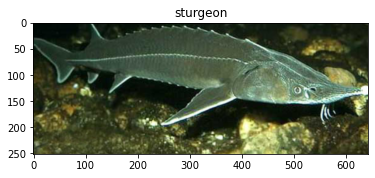

{'Brown_Trout': 2.0382724e-06, 'Cutthroat_trout': 3.306375e-07, 'LargeMouthBass': 5.8966798e-05, 'Rainbow_trout': 4.3988803e-07, 'brook_trout': 2.237074e-06, 'small_bass': 1.0057851e-06, 'sturgeon': 0.99993503}


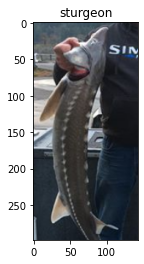

{'Brown_Trout': 0.24111502, 'Cutthroat_trout': 0.009976203, 'LargeMouthBass': 0.1874804, 'Rainbow_trout': 0.06421859, 'brook_trout': 0.0062022386, 'small_bass': 0.056551803, 'sturgeon': 0.4344557}


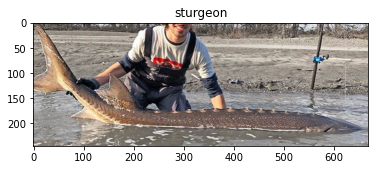

{'Brown_Trout': 0.031841803, 'Cutthroat_trout': 0.04300039, 'LargeMouthBass': 0.24749826, 'Rainbow_trout': 0.02434974, 'brook_trout': 0.014774516, 'small_bass': 0.018082408, 'sturgeon': 0.6204528}


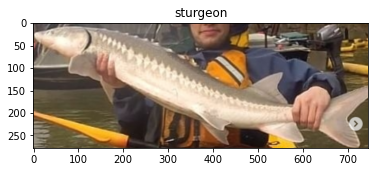

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
for filepath in glob.iglob(r'C:\Users\joshc\OneDrive\Desktop\test\*.png'):
    image =cv2.imread(filepath)

    ###change color of image to be displayed by matplotlib
    im2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    ###expand from 3 to 4 dimesion
    img1 = np.expand_dims(image, axis=0)

    ##convert to an numpy arr
    test = np.array(im2)

    ##predict the image
    result = model1.predict(img1)

    ##corespoding label integer
    y_classes = np.argmax(result, axis=1)

    ###predicting on the image
    single_pred = np.squeeze(model1.predict(img1))


    ##get labels
    labels = np.load('class_indicies' + '.npy', allow_pickle=True).item()
    class_indices = labels

    ###
    labels = dict((v,k) for k,v in labels.items())
    prediction = [labels[k] for k in y_classes]
    results=pd.DataFrame({"Predictions":prediction})


    ##get percents
    results_dict = dict(zip(class_indices.keys(), single_pred))


    ##Saves prediction as a string
    prediction = prediction.pop(0)

    print(results_dict)
    plt.imshow(test)
    plt.title(prediction)
    plt.show()

    cv2.imshow(prediction, image)


###Ends program
while True:
    key = cv2.waitKey(1)
    
    if key == ord('q'):
        break
cv2.destroyAllWindows()


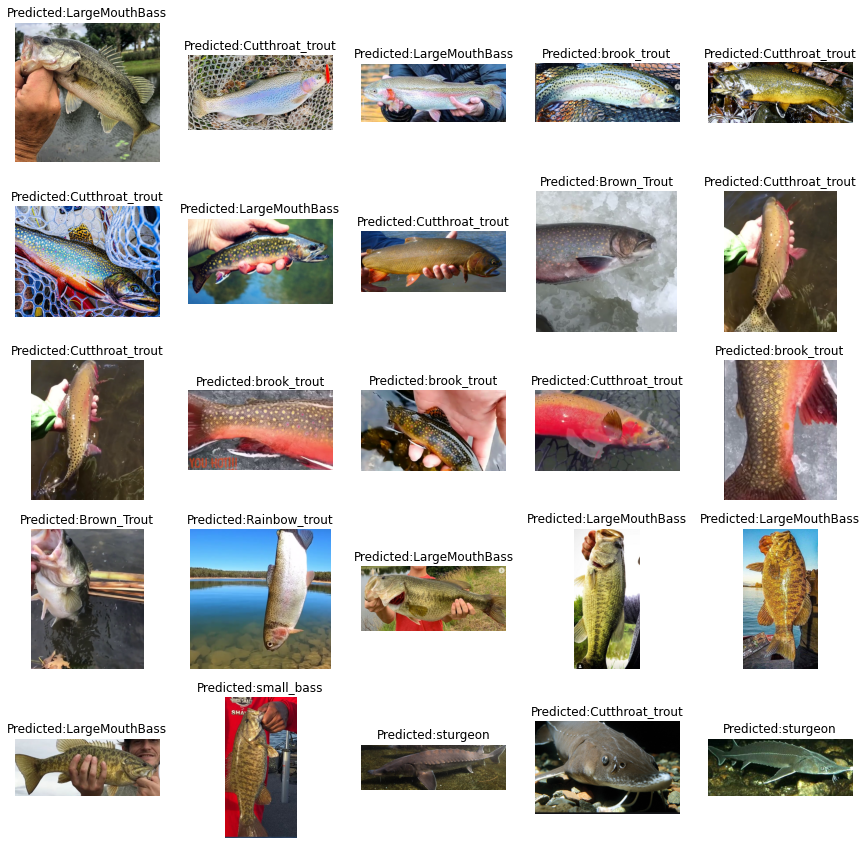

In [58]:
f, ax = plt.subplots(5, 5, figsize = (15, 15))
i =0
for filename in list:
    image =cv2.imread(filename)
    
    ###change color of image to be displayed by matplotlib
    im2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    ###expand from 3 to 4 dimesion
    img1 = np.expand_dims(image, axis=0)

    ##convert to an numpy arr
    test = np.array(im2)

    ##predict the image
    result = model1.predict(img1)

    ##corespoding label integer
    y_classes = np.argmax(result, axis=1)

    ###predicting on the image
    single_pred = np.squeeze(model1.predict(img1))


    ##get labels
    labels = np.load('class_indicies' + '.npy', allow_pickle=True).item()
    class_indices = labels

    ###
    labels = dict((v,k) for k,v in labels.items())
    prediction = [labels[k] for k in y_classes]
    results=pd.DataFrame({"Predictions":prediction})


    ##get percents
    results_dict = dict(zip(class_indices.keys(), single_pred))


    ##Saves prediction as a string
    prediction = prediction.pop(0)

    ax[i//5, i%5].imshow(im2)
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title("Predicted:{}".format(prediction))    
    i+=1
plt.show()